### Student Information
Name: 許家綺

Student ID: 109700019

GitHub ID: catherineabcde

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [3]:
!pip install git+https://github.com/UdayLab/PAMI.git

  Cloning https://github.com/UdayLab/PAMI.git to /private/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/pip-req-build-6kem262j
  Running command git clone --filter=blob:none --quiet https://github.com/UdayLab/PAMI.git /private/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/pip-req-build-6kem262j
  Resolved https://github.com/UdayLab/PAMI.git to commit da8dc5025aaaea6c036ff35840b6d2f802471322
  Preparing metadata (setup.py) ... done


### Begin Assignment Here

# First: Take Home Exercise

In [4]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

### Answer here

In [5]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd # my functions
import helpers.data_mining_helpers as dmh

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

df = X.copy()
# (1) access attributes (text, category, category_name as a tuple respectively
df.text, df.category, df.category_name

(0       From: sd345@city.ac.uk (Michael Collier) Subje...
 1       From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
 2       From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
 3       From: s0612596@let.rug.nl (M.M. Zwart) Subject...
 4       From: stanly@grok11.columbiasc.ncr.com (stanly...
                               ...                        
 2252    From: roos@Operoni.Helsinki.FI (Christophe Roo...
 2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
 2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
 2255    From: Dan Wallach <dwallach@cs.berkeley.edu> S...
 2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
 Name: text, Length: 2257, dtype: object,
 0       1
 1       1
 2       3
 3       3
 4       3
        ..
 2252    2
 2253    2
 2254    2
 2255    2
 2256    2
 Name: category, Length: 2257, dtype: int64,
 0                comp.graphics
 1                comp.graphics
 2       soc.religion.christian
 3       soc.religion.christian
 4       soc.re

In [6]:
# (2) access category equals to 0, 1, 2, 3 as a tuple respectively
df1 = df[df['category'] == 0]
df2 = df[df['category'] == 1]
df3 = df[df['category'] == 2]
df4 = df[df['category'] == 3]
df1, df2, df3, df4

# sort the data by category number in ascending order
df5 = df.sort_values(by = 'category', ascending = True)

# show the first 10 rows of each category
cat_num = len(df5['category'].unique())
for i in range(cat_num):
    print(df5[df5['category'] == i][:5])

                                                   text  category  \
745   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1504  Subject: Re: Death Penalty (was Re: Political ...         0   
1621  From: nancyo@shnext15.ucslabs.sfu.ca (Nancy Pa...         0   
365   From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
1798  From: keith@cco.caltech.edu (Keith Allan Schne...         0   

     category_name  
745    alt.atheism  
1504   alt.atheism  
1621   alt.atheism  
365    alt.atheism  
1798   alt.atheism  
                                                   text  category  \
1703  From: oved3b@kih.no (Ove Petter Tro) Subject: ...         1   
1602  Subject: Cornerstone DualPage driver wanted Fr...         1   
1702  From: jack@robotics.jpl.nasa.gov (Jack Morriso...         1   
1588  From: g.coulter@daresbury.ac.uk (G. Coulter) S...         1   
852   From: prestonm@cs.man.ac.uk (Martin Preston) S...         1   

      category_name  
1703  comp.graphics  


In [7]:
# (3) group the data by 'category_name'
df6 = df.groupby('category_name')

# print the grouped results and the corresponding value in column 'text'
for grp_name, grp in df6:
    print('Group:' f'{grp_name}')
    print(grp['text'])

# calculate the number of members in each group
mem_num = df6.size()
print(mem_num)

Group:alt.atheism
12      From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
13      Subject: So what is Maddi? From: madhaus@netco...
17      Organization: Penn State University From: <JSN...
19      Subject: Re: Don't more innocents die without ...
21      From: gmiller@worldbank.org (Gene C. Miller) S...
                              ...                        
2231    Subject: Re: Feminism and Islam, again From: k...
2233    From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...
2234    From: David.Rice@ofa123.fidonet.org Subject: i...
2237    From: datepper@phoenix.Princeton.EDU (David Aa...
2250    From: ingles@engin.umich.edu (Ray Ingles) Subj...
Name: text, Length: 480, dtype: object
Group:comp.graphics
0       From: sd345@city.ac.uk (Michael Collier) Subje...
1       From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
11      From: amjad@eng.umd.edu (Amjad A Soomro) Subje...
14      From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...
15      From: Mike_Peredo@mindlink.bc.ca (Mike Peredo

---------------------------------------------------------  Split Line -------------------------------------------------------------------

### >>> Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.
Please check the data and the process below, describe what you observe and why it happened. Hint:why .isnull() didn'twork?

In [8]:
import numpy as np
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN' },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example': None },
           { 'id': 'F', 'missing_example': '' }]
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer here
The reason for C, D and F are considered not null is that the isnull() function regard C, D and F as string, so the results of the judgement will turn out to be 'False'.

---------------------------------------------------------  Split Line -------------------------------------------------------------------

### >>> Exercise 6 (take home)
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [10]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

### Answer here
1. Length of the data reduces from 2257 to 1000
2. The sampling rate for each category is similar (approximately 45%).
3. Each category accounts for approximately the same proportion in X_sample as in X.

In [11]:
# 1. test the length of X and X_sample and represent them as a tuple
len(X), len(X_sample)

(2257, 1000)

In [12]:
# 2-1 analyze the number of member in 'category' of X and X_sample
X_grp = X.groupby('category')
Xs_grp = X_sample.groupby('category')
# number of each group of X
pd.DataFrame(X_grp.size())

0
category     
0         480
1         584
2         594
3         599

In [13]:
# 2-2 number of each group of X_sample
pd.DataFrame(Xs_grp.size())

0
category     
0         222
1         255
2         241
3         282

In [14]:
# 2-3 Calculate the number of each category member before and after sampling
original_num_of_each_group = X_grp.size().tolist()
sample_num_of_each_group = Xs_grp.size().tolist()
for i in range(len(original_num_of_each_group)):
    print(sample_num_of_each_group[i] /original_num_of_each_group[i], end =', ')

0.4625, 0.4366438356164384, 0.4057239057239057, 0.4707846410684474, 

In [15]:
# 3-1 Calculate the percentage of each category in the entire dataset (before sampling)
for i in range(len(original_num_of_each_group)):
    print((original_num_of_each_group[i]/len(X)) * 100)

21.267168808152416
25.875055383252104
26.31812140008861
26.53965440850687


In [16]:
# 3-2 Calculate the percentage of each category in the entire dataset (after sampling)
for i in range(len(sample_num_of_each_group)):
    print((sample_num_of_each_group[i]/len(X_sample)) * 100)

22.2
25.5
24.099999999999998
28.199999999999996


---------------------------------------------------------  Split Line -------------------------------------------------------------------

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

### Answer here

Original Dataset category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64
Sample Dataset category_name
soc.religion.christian    282
comp.graphics             255
sci.med                   241
alt.atheism               222
Name: count, dtype: int64


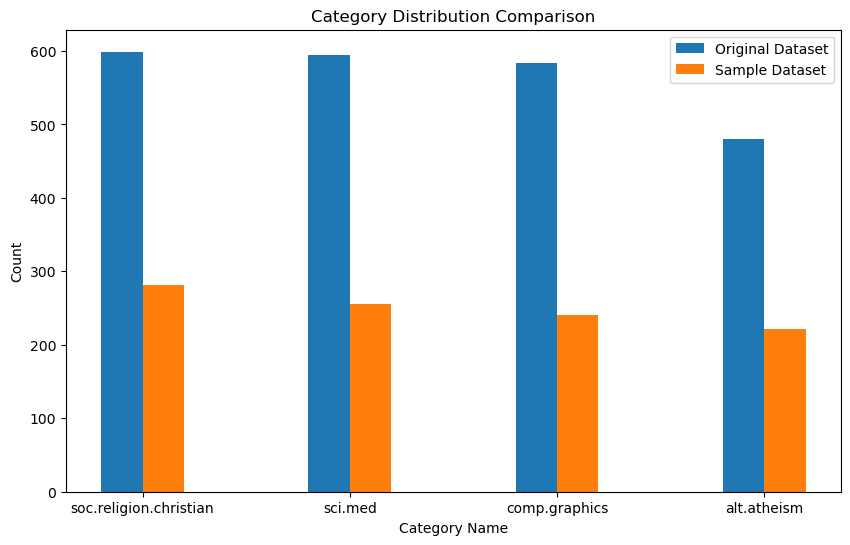

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Original Dataset', X.category_name.value_counts())
print('Sample Dataset', X_sample.category_name.value_counts())


# Get the value counts for both datasets
Y_X = X['category_name'].value_counts()
Y_XS = X_sample['category_name'].value_counts()

# Set the categories (x-axis)
categories = Y_X.index

# Set the positions for the bars
bar_width = 0.2
index = np.arange(len(categories))

# Plot the barcharts
plt.figure(figsize=(10,6))

plt.bar(index, Y_X, bar_width, label='Original Dataset')
plt.bar(index + bar_width, Y_XS, bar_width, label='Sample Dataset')

# Add labels and title
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.title('Category Distribution Comparison')

# Set the bars arrangement, text angle, and horizontal alignment
plt.xticks(index + bar_width / 2, categories, rotation=0, ha='center')

# Show the dataset label
plt.legend() 

---------------------------------------------------------  Split Line -------------------------------------------------------------------

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [19]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [20]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

### Answer here

In [21]:
# import necessary libraries
import numpy as np

# Get the indicies of the data with value 1 in document 5
indicies = np.where(X_counts[4].toarray()[0] == 1)[0]

# Choose the second index
index = indicies[1]

# Retrieve the corresponding word from the document 
word = count_vect.get_feature_names_out()[index]

# Show the result
print(f"The second 1 in the fifth record represents the word '{word}'.")

The second 1 in the fifth record represents the word '01'.


---------------------------------------------------------  Split Line -------------------------------------------------------------------

heat map of our term-document matrix

In [22]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [23]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [24]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

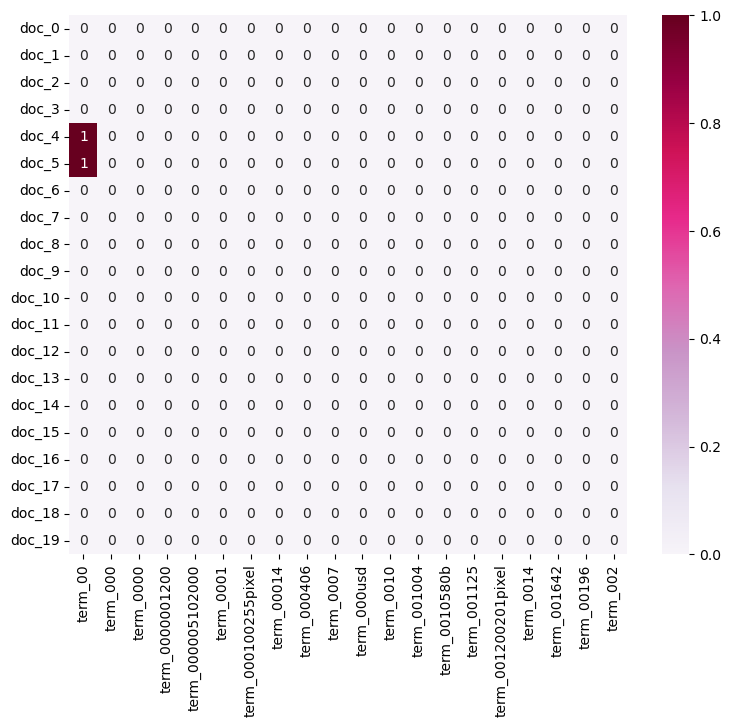

In [25]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### Answer here
Idea:
1. Traverse all documents and find the 20 terms that appear most frequent
2. For those documents which have some of the 20 terms, choose 20 documents with most terms
3. Plot the new histogram

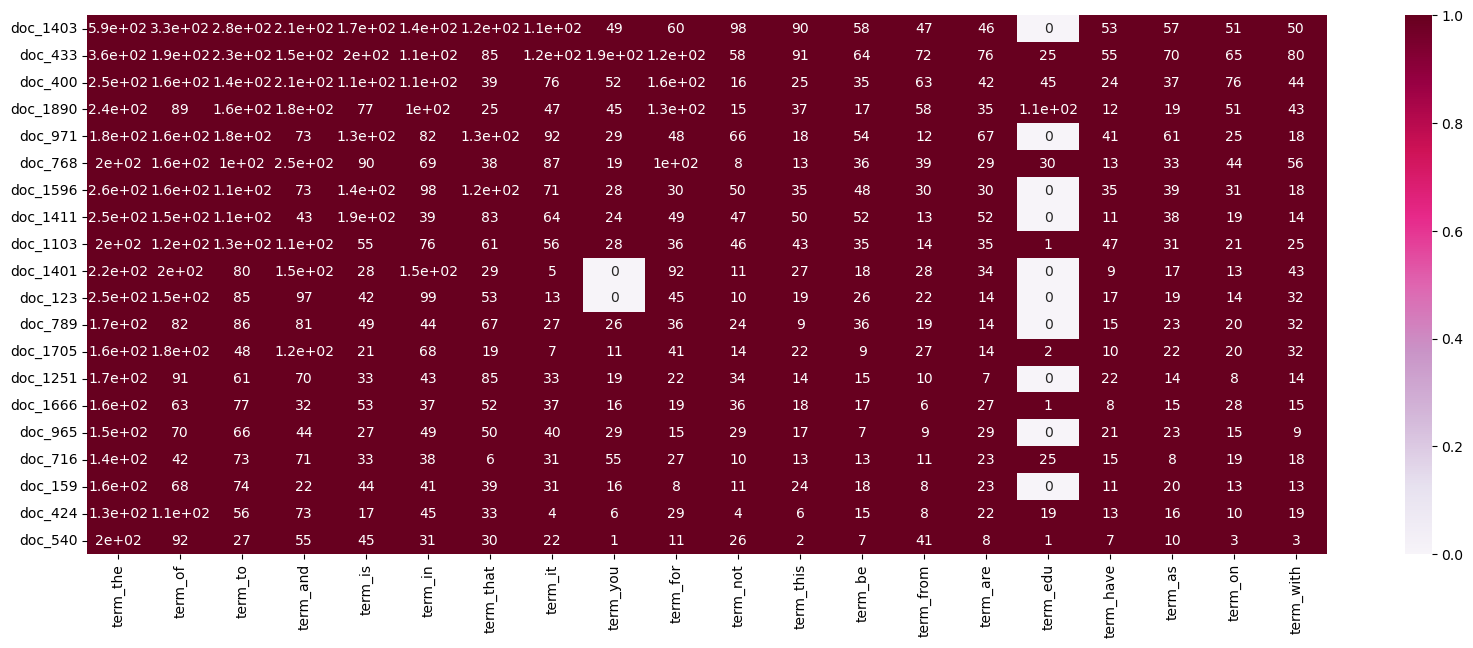

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Traverse all documents and find the 20 terms that appear most frequent

# Calculate the sum of appearing time of each term
term_counts = X_counts.toarray().sum(axis=0)  

# Extract the indicies of 20 terms which appear most frequent
top_terms = term_counts.argsort()[-20:][::-1]

# 2. For those documents which have some of the 20 terms, choose 20 documents with most terms

# Calculate how many terms in top_tems each document has
doc_term_counts = X_counts.toarray()[:, top_terms].sum(axis=1)

# Extract indicies of 20 documents which possess most terms in top_terms
top_docs = doc_term_counts.argsort()[-20:][::-1]

# 3. Plot the new histogram
plot_x2 = ["term_" + str(i) for i in count_vect.get_feature_names_out()[list(top_terms)[:]]]
plot_y2 = ["doc_" + str(i) for i in top_docs]

plot_z2 = X_counts[top_docs, :]
plot_z2 = plot_z2[:, top_terms]

df = pd.DataFrame(plot_z2.toarray(), columns=plot_x2, index=plot_y2)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
# Show the results
plt.show()

---------------------------------------------------------  Split Line -------------------------------------------------------------------

In [27]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [28]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [29]:
term_frequencies[0] #sum of first term: 00

134

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_11202/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


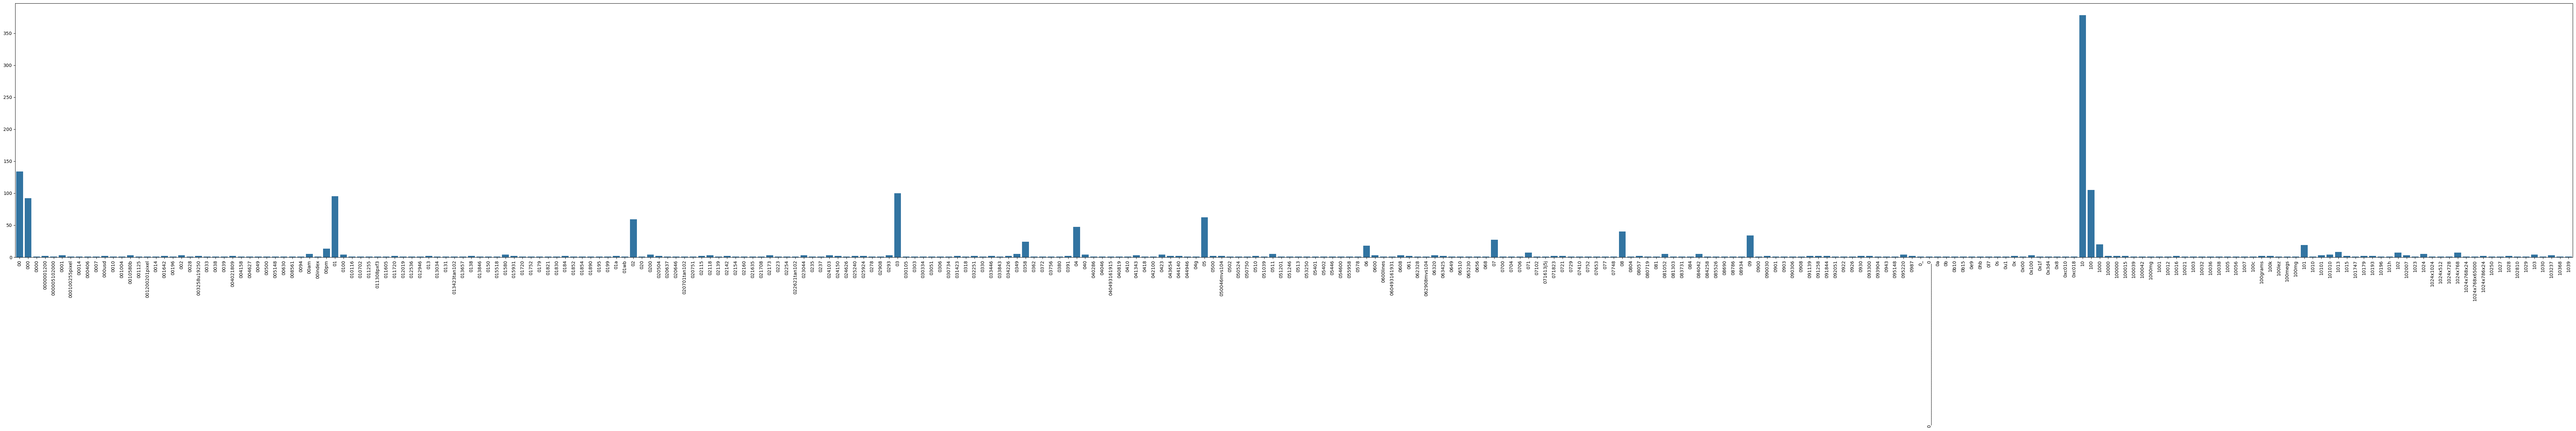

In [30]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

### Answer here

In [31]:
!pip install plotly

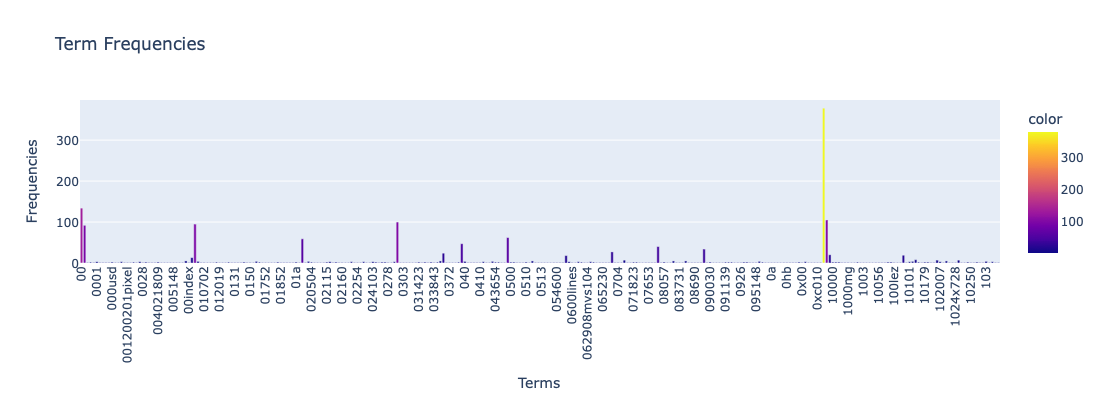

In [32]:
import plotly.express as px
import numpy as np

# Calculate the term frequency
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Capture the first 300 terms and their corresponding frequencies (as example)
terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Plot the figure with 'plotly'
fig = px.bar(x=terms, y=frequencies,
             title='Term Frequencies',
             labels={'x':'Terms', 'y':'Frequencies'},
             color=frequencies, 
             color_continuous_scale='Plasma')

# Arrange the x-axis
fig.update_layout(xaxis_tickangle=-90, width=1100, height=400)

# Show the plot
fig.show()

---------------------------------------------------------  Split Line -------------------------------------------------------------------

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


### Answer here
Select the terms with high frequencies (select the top 150)

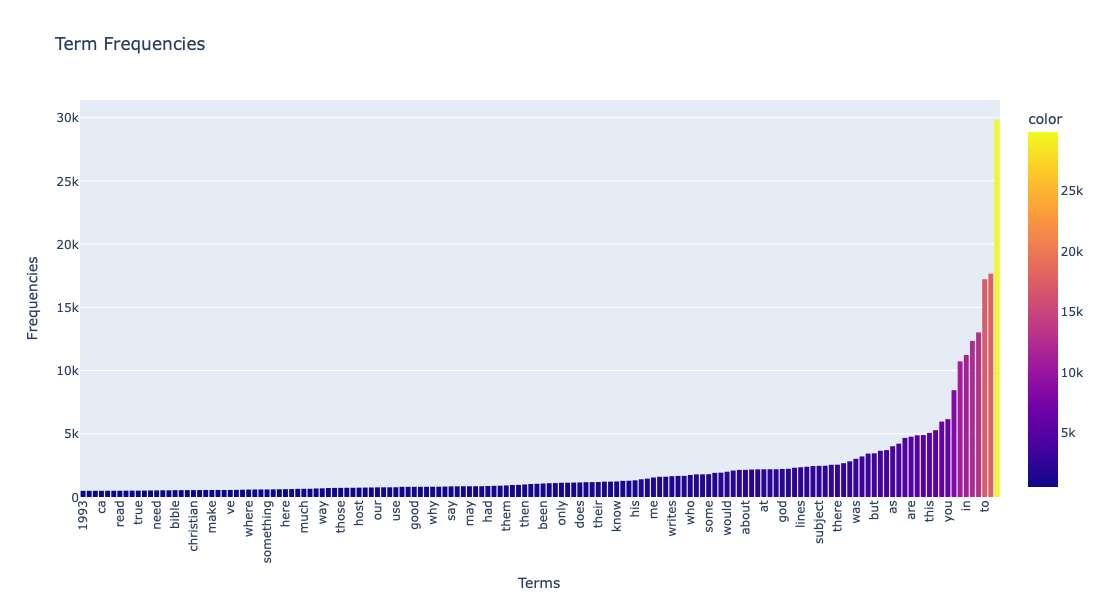

In [33]:
import plotly.express as px
import numpy as np

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# Extract the top 150 frequency terms
idx = np.argsort(term_frequencies)[-150:]
top_terms = terms[idx]
top_freq = term_frequencies[idx]

# Plot the figure with 'plotly'
plot = px.bar(x=top_terms, y=top_freq, labels={'x':'Terms', 'y':'Frequencies'},
             title=f'Term Frequencies',
             color=top_freq,  
             color_continuous_scale='Plasma')

# Arrange the x-axis
plot.update_layout(xaxis_tickangle=-90, width=1000, height=600)

# Modify the distances between bars and the width of the bar
plot.update_traces(marker_line_width=0, width=0.8)

# Show the plot
plot.show()

---------------------------------------------------------  Split Line -------------------------------------------------------------------

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

### Answer here
Flip the plot of Exercise 13 horizontally

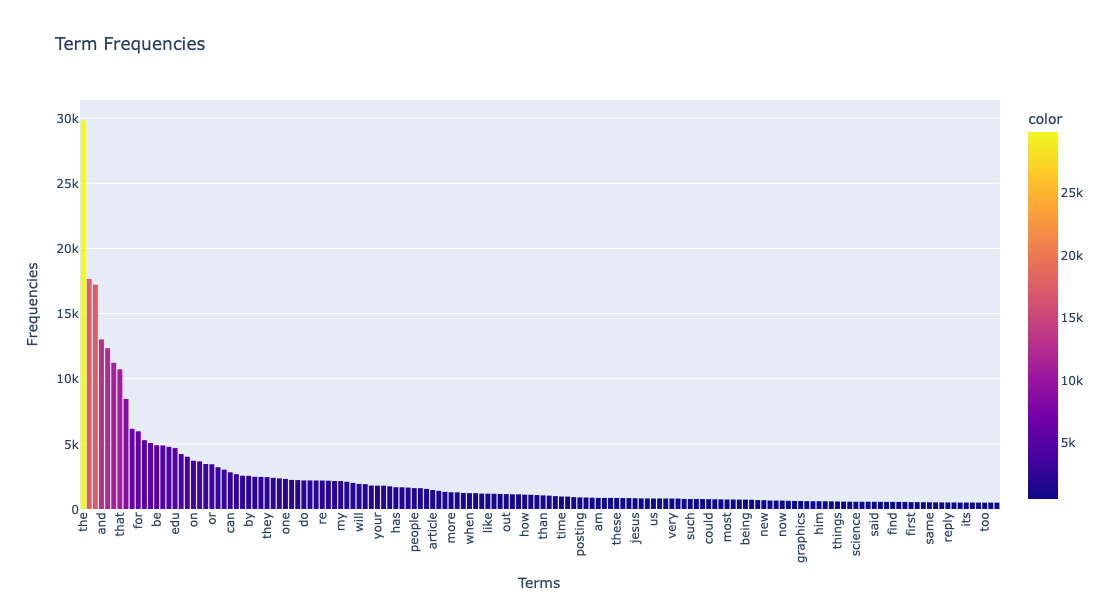

In [34]:
import plotly.express as px
import numpy as np

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# Extract the top 150 frequency terms
idx = np.argsort(term_frequencies)[-150:][::-1]
top_terms = terms[idx]
top_freq = term_frequencies[idx]

# Plot the figure with 'plotly'
plot = px.bar(x=top_terms, y=top_freq, labels={'x':'Terms', 'y':'Frequencies'},
             title=f'Term Frequencies',
             color=top_freq,  
             color_continuous_scale='Plasma')

# Arrange the x-axis
plot.update_layout(xaxis_tickangle=-90, width=1000, height=600)

# Modify the distances between bars and the width of the bar
plot.update_traces(marker_line_width=0, width=0.8)

# Show the plot
plot.show()

---------------------------------------------------------  Split Line -------------------------------------------------------------------

/var/folders/10/qz08zc8n09n5vxkrhs_4wvl40000gn/T/ipykernel_11202/3655612951.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



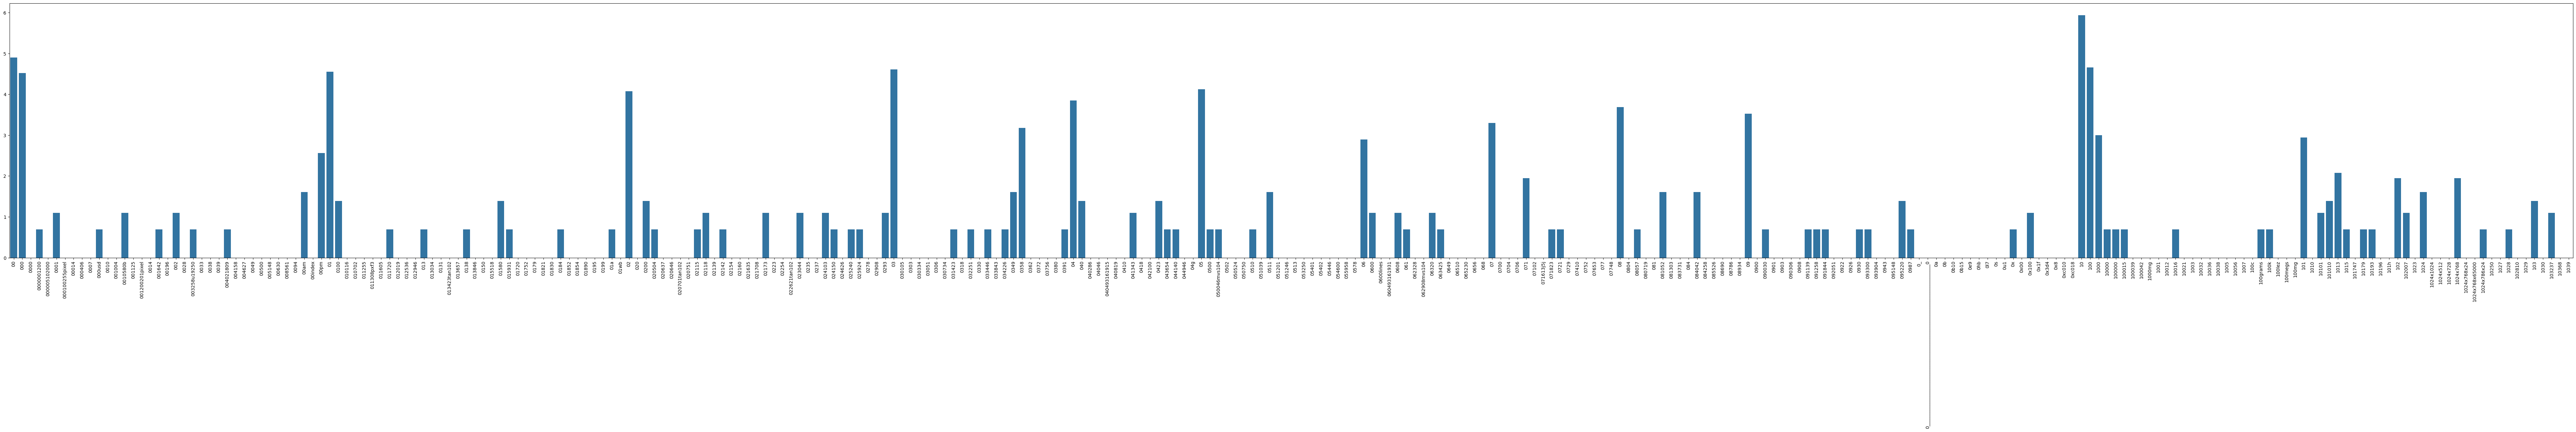

In [35]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

### Answer here

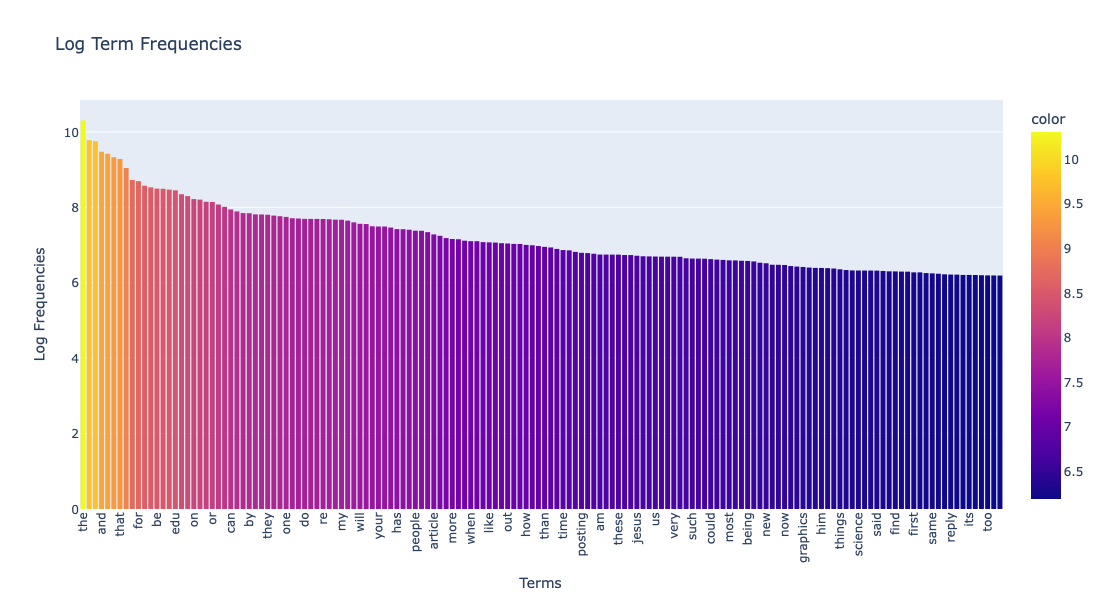

In [36]:
import plotly.express as px
import numpy as np
import math


term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()

# Extract the top 150 frequency terms
idx = np.argsort(term_frequencies)[-150:][::-1]
top_terms = terms[idx]
top_freq = term_frequencies[idx]
top_freq_log = [math.log(i) for i in top_freq]

# Plot the figure with 'plotly'
plot = px.bar(x=top_terms, y=top_freq_log, labels={'x':'Terms', 'y':'Log Frequencies'},
             title=f'Log Term Frequencies',
             color=top_freq_log,  
             color_continuous_scale='Plasma')

# Arrange the x-axis
plot.update_layout(xaxis_tickangle=-90, width=1000, height=600)

# Modify the distances between bars and the width of the bar
plot.update_traces(marker_line_width=0, width=0.8)

# Show the plot
plot.show()

This result is the logarithm distibution of Exercise 14 (i.e. top 150 most frequent terms).
From the perspective of the differences between the two plots, we can see that the plot become smoother, whcih means the frequency gap among all these terms involved become smaller. In addition, the original plot have a very long 'tail', compared with the logarithm version, become closer to normal distribution.

---------------------------------------------------------  Split Line -------------------------------------------------------------------

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [38]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category comp.graphics we filter the following words:
Bottom 1.0% words: 
initworld    1
jkpg         1
jiu1         1
jiu          1
jfreund      1
            ..
lab2         1
laaksone     1
l4v          1
l300         1
l14h11       1
Length: 137, dtype: int64
Top 5.0% words: 
40               27
distributed      27
open             27
multi            27
getting          27
               ... 
is             1751
and            2382
of             2470
to             2775
the            4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
disparate       1
expose          1
explosive       1
resisting       1
exploitation    1
               ..
fence           1
feminist        1
remarriage      1
remarried       1
remeber         1
Length: 138, dtype: int64
Top 5.0% words: 
pagan        36
claims       36
gave         36
parts        36
jr           37
          ...  
that       4393
and        4409
to        

000  000005102000  000100255pixel  0007  000usd  0010580b  \
0      0             0               0     0       0         0   
1      0             0               0     0       0         0   
2      0             0               0     0       0         0   
3      0             0               0     0       0         0   
4      0             0               0     0       0         0   
..   ...           ...             ...   ...     ...       ...   
579    0             0               0     0       0         0   
580    0             0               0     0       0         0   
581    0             0               0     0       0         0   
582    0             0               0     0       0         0   
583    0             0               0     0       0         0   

     001200201pixel  00196  002  0028  ...  zorn  zrz  zsoft  zt  zug  zurich  \
0                 0      0    0     0  ...     0    0      0   0    0       0   
1                 0      0    0     0  ...     0    0      0   0    0       0   
2                 0      0    0     0  ...     0    0      0   0    0       0   
3                 0      0    0     0  ...     0    0      0   0    0       0   
4                 0      0    0     0  ...     0    0      0   0    0       0   
..              ...    ...  ...   ...  ...   ...  ...    ...  ..  ...     ...   
579               0      0    0     0  ...     0    0      0   0    0       0   
580               0      0    0     0  ...     0    0      0   0    0       0   
581               0      0    0     0  ...     0    0      0   0    0       0   
582               0      0    0     0  ...     0    0      0   0    0       0   
583               0      0    0     0  ...     0    0      0   0    0       0   

     zvi  zyeh  zyxel  ªl  
0      0     0      0   0  
1      0     0      0   0  
2      0     0      0   0  
3      0     0      0   0  
4      0     0      0   0  
..   ...   ...    ...  ..  
579    0     0      0   0  
580    0     0      0   0  
581    0     0      0   0  
582    0     0      0   0  
583    0     0      0   0  

[584 rows x 12932 columns]

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

### Answer here

From the top 5% terms of filtered by all categories, we can observe the similarities are that there are lots of 'stopwords'.
From both the top 5% and the bottom 1%, we can notice the differences are that there are composed of some category-related words for each category.

In [39]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.5206450557005
Variance in Transaction Sizes : 23302.44862132569
Sparsity : 0.995637745806304


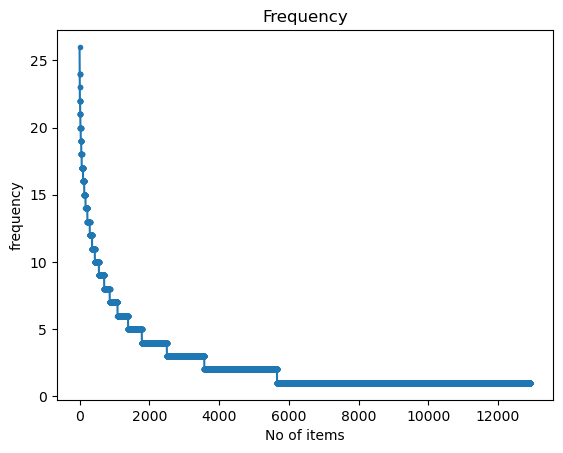

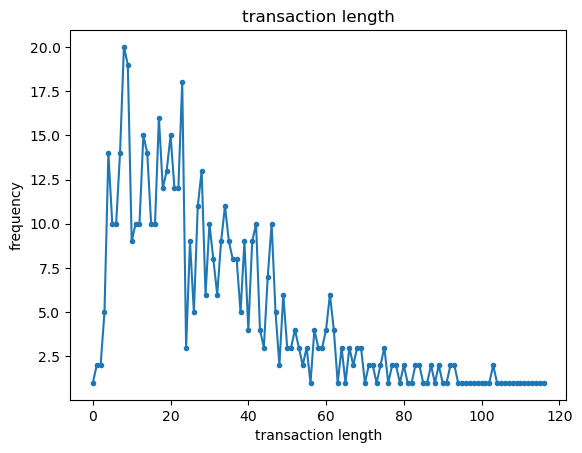

In [40]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

---------------------------------------------------------  Split Line -------------------------------------------------------------------

In [41]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.10937118530273438


In [42]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.11414694786071777


In [43]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.08036208152770996


In [44]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.14001798629760742


### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

### Answer here

1. MaxFPGrowth algorithm

In [45]:
# Minimum support: 3
# import the algorithm
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg 
minSup=3
obj3 = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) # measure the runtime

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 6872
Runtime: 13.03620195388794


In [46]:
obj3.save('freq_patterns_comp_graphics_minSup3.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0     due bytes responsible 000 opinion 640x480 rob ...        3
1                                                  bag         3
2                                          garbo uwasa         3
3             wrong 200 responsible 000 umn 480 640 tc         3
4                                responsible 000 essex         3
...                                                 ...      ...
6867                                    didn wondering         3
6868                             feel wrong personally         3
6869                                     wrong correct         3
6870                                      life correct         3
6871                                        maybe life         4

[6872 rows x 2 columns]

In [47]:
# Minimum support: 6
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
minSup=6
obj6 = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj6.mine()
frequentPatternsDF_comp_graphics= obj6.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj6.getRuntime())) #measure the runtime

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 1340
Runtime: 0.16643285751342773


In [48]:
obj6.save('freq_patterns_comp_graphics_minSup6.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0                              tim brock         6
1                                   face         6
2                                 pardon         6
3     removal silent assassin cellar tsa         6
4                               creative         6
...                                   ...      ...
1335                            feel apr         8
1336                                didn        22
1337                               wrong        23
1338                               tried        24
1339                               ideas        24

[1340 rows x 2 columns]

In [49]:
# Minimum support: 9
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
minSup=9
obj9 = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj9.mine()
frequentPatternsDF_comp_graphics= obj9.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj9.getRuntime())) #measure the runtime

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 660
Runtime: 0.06992316246032715


In [50]:
obj6.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0                    tim         9
1                 option         9
2          rumours 68070         9
3                   chip         9
4    rumours mcmains unt         9
..                    ...      ...
655                wrong        23
656                tried        24
657                ideas        24
658                 life        24
659                maybe        26

[660 rows x 2 columns]

2. FAE (Feature Attribute Evaluation) Top-K

In [51]:
# Import necessary libraries and modules
from PAMI.frequentPattern.topk import FAE  as alg
import pandas as pd

In [52]:
minimumSupportCountList = [500, 1000, 1500]

# Initialize a dataframe to store the results of FAE algorithm
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime'])

In [53]:
# Specify the algorithm name
algorithm = 'FAE' 
for minSupCount in minimumSupportCountList:
    obj_ = alg.FAE('td_freq_db_comp_graphics.csv', k=minSupCount, sep='\t')
    obj_.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj_.getPatterns()), obj_.getRuntime()]

# Show the results
print(result)

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
  algorithm  minSup  patterns   runtime
0       FAE     500       500  0.805161
1       FAE    1000      1000  1.723950
2       FAE    1500      1500  4.207837


Compared with the results of previous alogorithm, the main differences that I identify are that it takes longer run time but extract much fewer patterns.
And the main similarity is that some of the patterns in the results are the same.

---------------------------------------------------------  Split Line -------------------------------------------------------------------

In [54]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                                     Patterns  Support
24766                                     gmt       34
20033                               institute       33
20032                                     gov       33
24765                                 snm6394       32
20031                                    form       31
...                                       ...      ...
21680    princeton al boy axes motss matching        9
21681   princeton al boy funds motss matching        9
21682  princeton al axes funds motss matching        9
21683    princeton et boy axes motss matching        9
0                                       swell        9

[24767 rows x 2 columns]
Number of patterns discarded: 1782


In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc et axes funds motss matching  \
0          0     0  ...                                 0   
1          0     0  ...                                 0   
2          0     0  ...                                 0   
3          0     0  ...                                 0   
4          0     0  ...                                 0   
...      ...   ...  ...                               ...   
2252       0     0  ...                                 0   
2253       0     0  ...                                 0   
2254       0     0  ...                                 0   
2255       0     0  ...                                 0   
2256       0     0  ...                                 0   

      soc boy axes funds motss matching  princeton al et boy motss matching  \
0                                     0                                   0   
1                                     0                                   0   
2                                     0                                   0   
3                                     0                                   0   
4                                     0                                   0   
...                                 ...                                 ...   
2252                                  0                                   0   
2253                                  0                                   0   
2254                                  0                                   0   
2255                                  0                                   0   
2256                                  0                                   0   

      princeton al et axes motss matching  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
2252                                    0   
2253                                    0   
2254                                    0   
2255                                    0   
2256                                    0   

      princeton al et funds motss matching  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
2252                                     0   
2253                                     0   
2254                                     0   
2255                                     0   
2256                                     0   

      princeton al boy axes motss matching  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...              

In [56]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

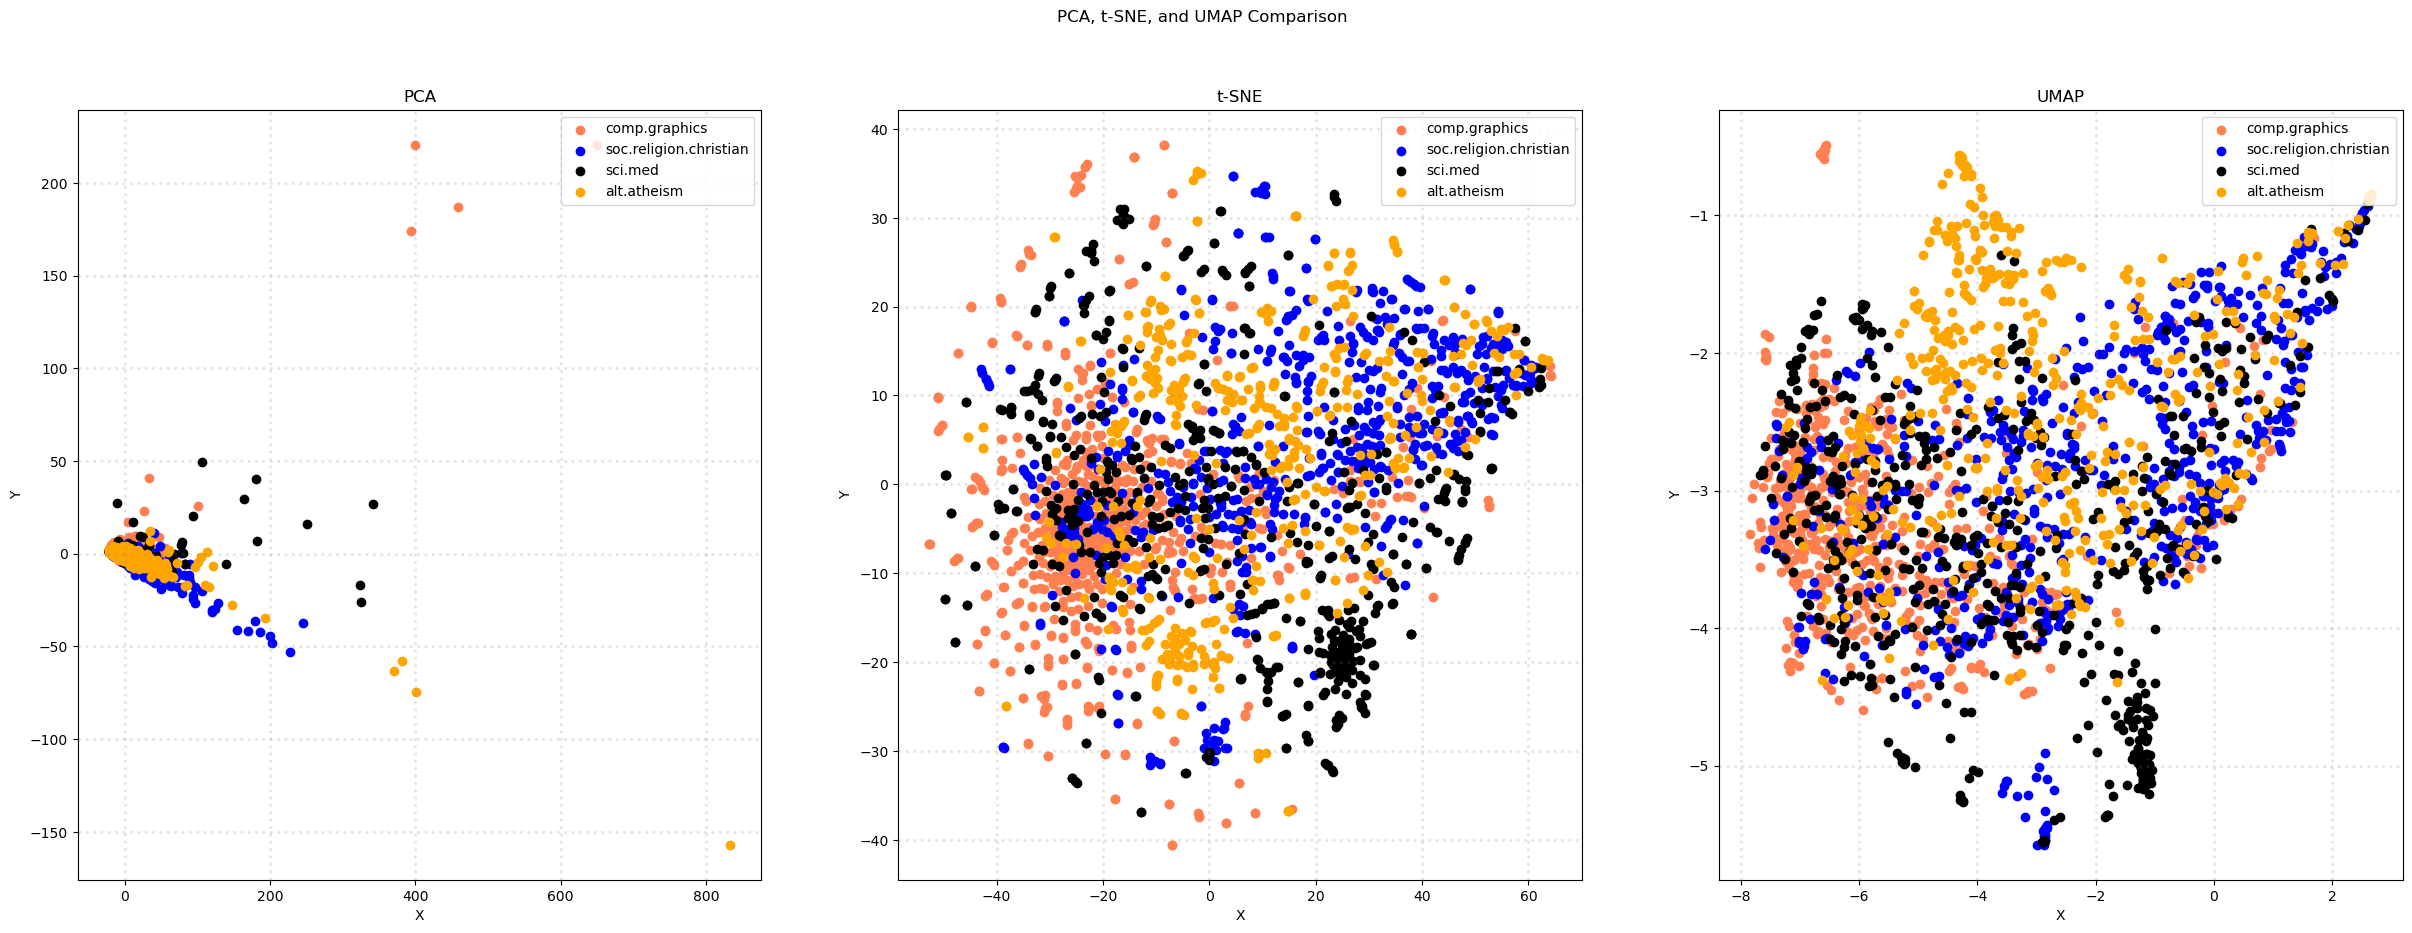

In [57]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

### Answer here

In [58]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

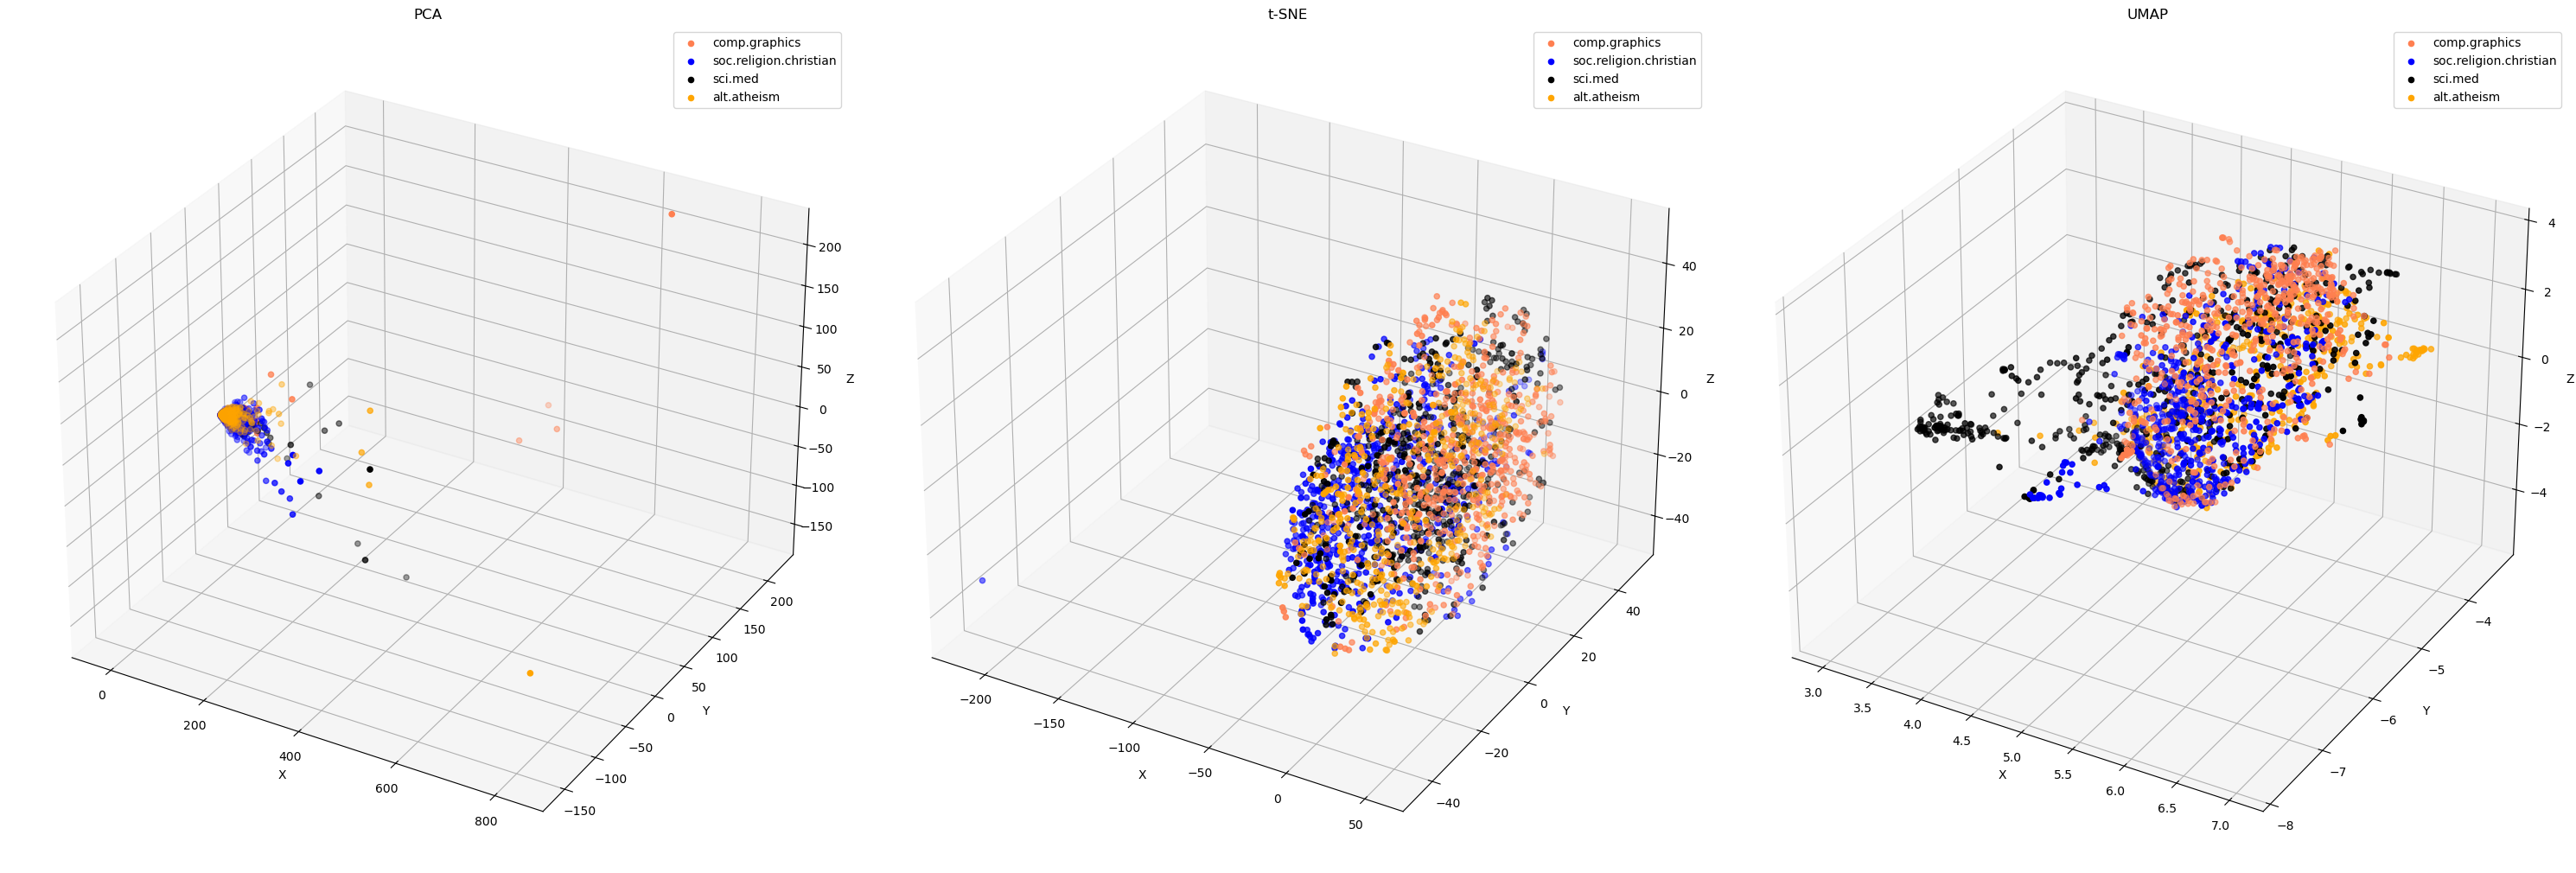

In [59]:
# import necessary libraries and modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(30, 10))

# Define a function to create a 3D scatter plot for each method
def plot_3d_scatter(ax, X_reduced, title):
  for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

  ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
  ax.set_title(title)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.legend(loc='upper right')

# Create 3D subplots and plot using the function
ax_pca = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax_pca, X_pca_aug, 'PCA')

ax_tsne = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax_tsne, X_tsne_aug, 't-SNE')

ax_umap = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax_umap, X_umap_aug, 'UMAP')

plt.tight_layout()
plt.show()

---------------------------------------------------------  Split Line -------------------------------------------------------------------

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

### Answer here

In [60]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [61]:
mlb = preprocessing.LabelBinarizer()

In [62]:
mlb.fit(X.category_name)

LabelBinarizer()

In [63]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [64]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                     tokenized_text  \
0           comp.graphics  {M.P.Collier@uk.ac.city, into, images, Compute...   
1           comp.graphics  {For, bounded, as, into, along, cells., by, re...   
2  soc.religion.christian  {support, -, >could, age, indulgence., (it's, ...   
3  soc.religion.christian  {and, Masja,, Thanx,, der, abortion-law,, afte...   
4  soc.religion.christian  {as, feast.'..., to, <Apr.8.00.57.41.1993.2824...   
5  soc.religion.christian  {tranfusion, IS, referee!", as, student,, tran...   
6  soc.religion.christian  {Indiana, news@cbnewsk.att.com, as, Timothy, 3...   
7                 sci.med  {whitehead, as, -, aldridge@netcom.com, along,...   
8                 sci.med  {respondent, ---------------------------------...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

---------------------------------------------------------  Split Line -------------------------------------------------------------------

From the binarization results showing above, we can conclude that this method works as well!